In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [8]:
headers = ["iteration", "elite.fitness", "elite.validation_fitness", "population_size", "selection_method", "crossover_method", "crossover_rate",
                             "mutation_method", "None", "None", "mutation_rate", "phenotypic_diversity_shift"]

In [15]:
#loading CSV of CIFO data
ps50 = pd.read_csv("ps50.csv",
                             sep= ",",
                             header = None,
                             names = headers)

ps25 = pd.read_csv("ps25.csv",
                             sep= ",",
                             header = None,
                             names = headers)

ps10 = pd.read_csv("ps10.csv",
                             sep= ",",
                             header = None,
                             names = headers)

ps = pd.concat([ps50, ps25, ps10])

ps["Pressure"] = 0.5
ps = ps.reset_index(drop=True)
ps = ps.drop(["None", "None.1"], axis=1)

In [20]:
ps.head()

iteration  elite.fitness  elite.validation_fitness  population_size  \
0          0       0.194387                  0.170124               50   
1          1       0.194387                  0.170124               50   
2          2       0.249480                  0.215768               50   
3          3       0.249480                  0.215768               50   
4          4       0.249480                  0.215768               50   

       selection_method     crossover_method  crossover_rate mutation_method  \
0  tournament_selection  one_point_crossover             0.5   ball_mutation   
1  tournament_selection  one_point_crossover             0.5   ball_mutation   
2  tournament_selection  one_point_crossover             0.5   ball_mutation   
3  tournament_selection  one_point_crossover             0.5   ball_mutation   
4  tournament_selection  one_point_crossover             0.5   ball_mutation   

   mutation_rate  phenotypic_diversity_shift  Pressure  
0            0.9                    0.008620       0.5  
1            0.9                   -0.003608       0.5  
2            0.9                    0.012098       0.5  
3            0.9                    0.001002       0.5  
4            0.9                    0.000760       0.5

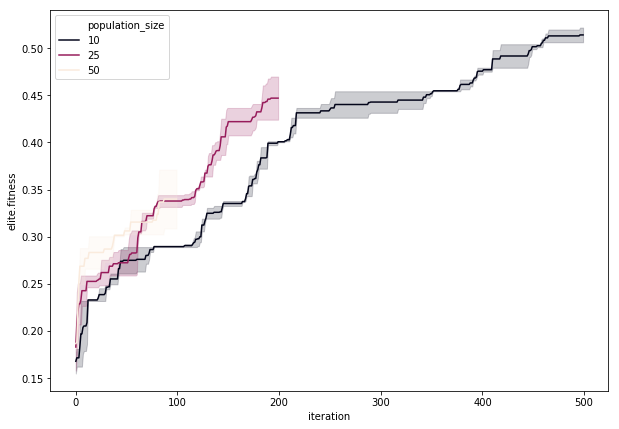

In [19]:
plt.subplots(figsize=(10,7))
sns.lineplot(x="iteration",
             y="elite.fitness",
             hue="population_size",
             data=ps,
            palette= "rocket",
            err_style="band",
            legend="full")